## fastai lesson 2: downloading images using the google api with Colab

## Get the images

In [0]:
# install using command line
!pip install google_images_download

    100% |████████████████████████████████| 911kB 13.3MB/s 
  Stored in directory: /root/.cache/pip/wheels/d2/23/84/3cec6d566b88bef64ad727a7e805f6544b8af4a8f121f9691c
Successfully built google-images-download


We download 20 images for each of our 3 keywords, which in this case are platypus, beach and coffee.

In [0]:
from google_images_download import google_images_download   #importing the library

response = google_images_download.googleimagesdownload()   #class instantiation

arguments = {"keywords":"platypus,beach,coffee","limit":20,"print_urls":True}   #creating list of arguments


paths = response.download(arguments)   #passing the arguments to the function
print(paths)   #printing absolute paths of the downloaded images


Item no.: 1 --> Item name = platypus
Evaluating...
Starting Download...
Image URL: https://www.nationalgeographic.com/content/dam/animals/thumbs/rights-exempt/mammals/p/platypus_thumb.ngsversion.1485376250110.adapt.1900.1.JPG
IOError on an image...trying next one... Error: The read operation timed out
Image URL: https://images.mentalfloss.com/sites/default/files/styles/mf_image_16x9/public/63062-istock-658344164.jpg?itok=9A7q2BFc&resize=1100x1100
Completed Image ====> 1. 63062-istock-658344164.jpg
Image URL: https://daily.jstor.org/wp-content/uploads/2018/04/platypus_1050x700.jpg
Completed Image ====> 2. platypus_1050x700.jpg
Image URL: https://media.mnn.com/assets/images/2017/04/Platypus-Swimming-Water.jpg.653x0_q80_crop-smart.jpg
Completed Image ====> 3. platypus-swimming-water.jpg
Image URL: https://cdn.britannica.com/s:500x350/48/94548-004-19138F8D.jpg
Completed Image ====> 4. 94548-004-19138f8d.jpg
Image URL: https://cdn1.medicalnewstoday.com/content/images/articles/322/322156/pl

In [0]:
# this is the structure of the images 
ls

downloads/  sample_data/


In [0]:
cd downloads

/content/downloads


In [0]:
ls

beach/  coffee/  platypus/


In [0]:
cd platypus

/content/downloads/platypus


In [0]:
ls

'10. platypus-milk-3.jpg'
'11. 180702-schultz-platypus-tease_ngsm9o.jpg'
'12. 220px-schnabeltier_1.jpg'
'13. 2ba526f42aba7ee6cd48f63c1885316f?width=1024.jpg'
'14. firstpopulat.jpg'
'15. 301116_platypusvenom_2.jpg'
'1. 63062-istock-658344164.jpg'
'16. c164be95284bee65d8ba05e5ded73eae?width=1024.jpg'
'17. 74a6c06e-52c3-4cbe-9d07-686d6d13576e.jpg'
'18. https%3a%2f%2fblogs-images.forbes.com%2fspencerbogart%2ffiles%2f2017%2f12%2fduck-billed-platypus.jpg'
'19. platypus-01.jpg'
'20. nationalgeographic_2205953.jpg'
'2. platypus_1050x700.jpg'
'3. platypus-swimming-water.jpg'
'4. 94548-004-19138f8d.jpg'
'5. platypus-swimming.jpg'
'6. ahr0cdovl3d3dy5saxzlc2npzw5jzs5jb20vaw1hz2vzl2kvmdawlzawos82nzkvb3jpz2luywwvmdkwntexlxbsyxr5chvzltaylmpwzw==.jpg'
'7. 10480754-3x2-700x467.jpg'
'8. 10564920-3x2-700x467.jpg'
'9. platypus-dry-animal-profile-web620.jpg'


In [0]:
from fastai.vision import *

3 different folders, do not run in sequential order

here you specify the folders and files

In [0]:
folder = 'platypus'
file = 'platypus.txt' 

In [0]:
folder = 'beach'
file = 'beach.txt'

In [0]:
folder = 'coffee'
file = 'coffee.txt'

In [0]:
# 2
path = Path('/content/downloads/')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
path.ls()

[PosixPath('/content/downloads/beach'),
 PosixPath('/content/downloads/platypus'),
 PosixPath('/content/downloads/coffee')]

In [0]:
# 3 
classes = ['platypus','beach','coffee']

In [0]:
# verify images
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

platypus


beach


coffee


## View Data

In [0]:
# make results reproducable
np.random.seed(42)

# create databunch (had to lower batch size to 32)
data = ImageDataBunch.from_folder(path, bs = 32,train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
# check classes
data.classes

['beach', 'coffee', 'platypus']

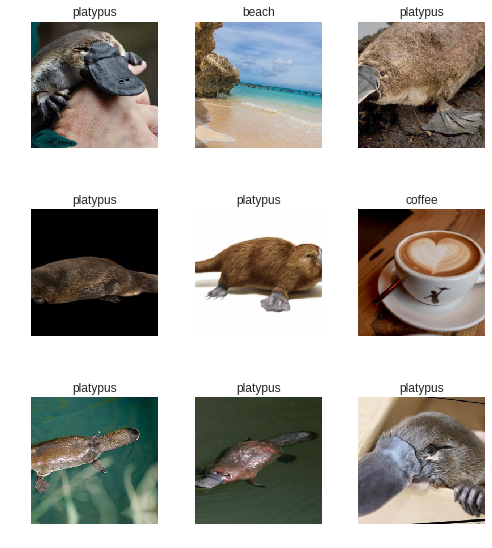

In [0]:
data.show_batch(rows=3, figsize=(7,8))

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['beach', 'coffee', 'platypus'], 3, 48, 12)

## Train Model

In [0]:
# create a learner
learn = create_cnn(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
87306240it [00:00, 91732458.68it/s]


In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,1.578789,0.832255,0.416667
2,1.348263,0.209365,0.000000
3,0.995769,0.064055,0.000000
4,0.759901,0.038716,0.000000


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 3.31E-06


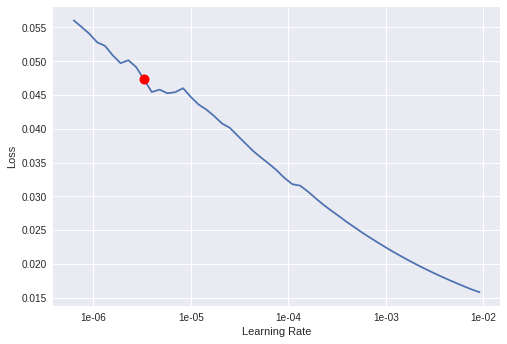

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate
1,0.039413,0.038931,0.000000
2,0.044152,0.031730,0.000000


In [0]:
learn.save('stage-2')

## Interpretation

In [0]:
learn.load('stage-2');

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

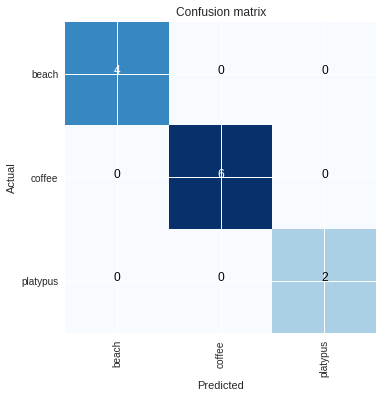

In [0]:
interp.plot_confusion_matrix()

## Cleaning up

In [0]:
learn.export()

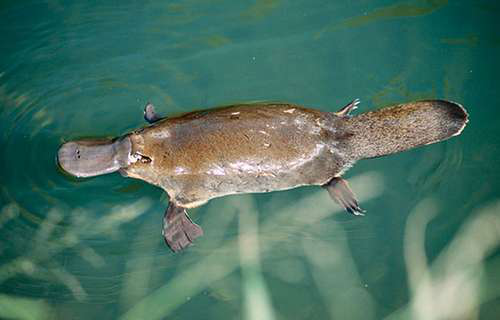

In [0]:
img = open_image(path/'platypus'/'4. 94548-004-19138f8d.jpg')
img

In [0]:
learn = load_learner(path)

In [0]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category platypus

## Improve model etc..
